In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
#import citipy
from citipy import citipy

In [5]:
#create a list for holding cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate [1]).city_name
    
    #If city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#print city count to confirm sufficient count
len(cities)

597

In [6]:
#import date time
from datetime import datetime
#Import the requests library
import requests

from config1 import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
#create empty list
city_data = []
#print the beginning of the logging
print("beginning Data Retrieval")
print("-----------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list:
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purpose
    if (i% 50 == 0 and i >= 50):
        set_count+=1
        record_count = 1
    #create endpoint url
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, rcord and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to teh record count
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"city": city.title(),
                          "lat": city_lat,
                          "lng": city_lng,
                          "max_temp": city_max_temp,
                          "humidity": city_humidity,
                          "cloudiness": city_clouds,
                          "wind_speed": city_wind,
                          "country": city_country,
                          "date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

beginning Data Retrieval
-----------------------
Processing Record 1 of Set 1 | kavieng
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | oktyabrskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | willowmore
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | nikolskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | khatanga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | atuona
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | waipawa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | alofi


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | qaanaaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | sorland
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | port macquarie
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | spokane
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | barentsburg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | busselton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2 | muromtsevo
-----------------------------
Data Retrieval C

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | arlit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | port hedland
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | port hardy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | miguel auza
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | kendari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 3 | crossville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 3 | pilar
-----------------------------
Data Retrieval Complete      
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | rio gallegos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | ponta do sol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | nome
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | georgetown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | kerema
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 4 | souillac
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 4 | nuevitas
-----------------------------
Data Retrieval Complete      
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | san pedro de ycuamandiyu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | cherskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | bambous virieux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | denpasar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 6 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 6 | gizo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 6 | tuatapere
-----------------------------
Data Retrieval Complete      
--------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | perevolotskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | northam
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | kudahuvadhoo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 7 | koslan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 7 | trairi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 7 | toliary
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 7 | sokolo
-----------------------------
Data Retrieval Complete 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | wanning
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | serenje
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | talnakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 8 | weligama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 8 | najran
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 8 | astoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 8 | faya
-----------------------------
Data Retrieval Complete      
-----------------------------
Pro

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | sovetskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | ahipara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | baruun-urt
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 9 | santa rosa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 9 | bababe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 9 | parana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 9 | mango
-----------------------------
Data Retrieval Complete     

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | goderich
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | hasaki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | lampang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 11 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 11 | kankan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 11 | kirakira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 11 | tahoua
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | healdsburg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | moron
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 12 | iqaluit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 12 | eenhana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 12 | oriximina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 12 | gimli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 12 | jacqueville
-----------------------------
Data Retrieval Complete      
------------------

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Kavieng,-2.5744,150.7967,81.46,65,86,6.55,PG,2021-01-21 20:41:42
1,Oktyabrskoye,43.0645,44.7417,19.00,86,0,2.24,RU,2021-01-21 20:41:42
2,Willowmore,-33.2926,23.4895,76.87,47,2,4.99,ZA,2021-01-21 20:41:43
3,Nikolskoye,59.7035,30.7861,14.00,85,90,17.90,RU,2021-01-21 20:41:43
4,Khatanga,71.9667,102.5000,-32.30,84,98,2.93,RU,2021-01-21 20:41:43
5,Atuona,-9.8000,-139.0333,77.41,79,36,12.39,PF,2021-01-21 20:41:43
6,Waipawa,-41.4122,175.5153,62.01,72,16,5.75,NZ,2021-01-21 20:41:43
7,Alofi,-19.0595,-169.9187,82.40,89,75,5.75,NU,2021-01-21 20:41:44
8,Rawson,-43.3002,-65.1023,82.54,32,43,19.44,AR,2021-01-21 20:41:44
9,Hilo,19.7297,-155.0900,78.80,57,1,6.91,US,2021-01-21 20:41:44


In [9]:
new_column_order = ["city", "country", "date", "lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed"]
city_data_df = city_data_df[new_column_order]


In [10]:
#create the ouput file (CSV)
output_data_file = "weather_data/cities.csv"
#export the City_data into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
#Extract relevant fields
lats = city_data_df["lat"]
max_temps = city_data_df["max_temp"]
humidity = city_data_df["humidity"]
cloudiness = city_data_df["cloudiness"]
wind_speed = city_data_df["wind_speed"]


In [12]:
import time

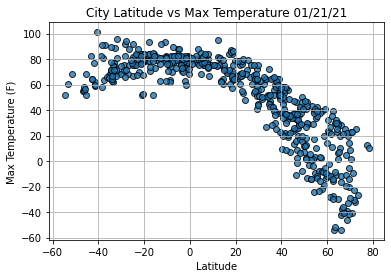

In [13]:
#build the scatter plot for latitude vs max temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            label = "Cities", alpha = .8
           )
#Incorporate other properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the plt
plt.savefig("weather_data/Fig1.png")
plt.show() 

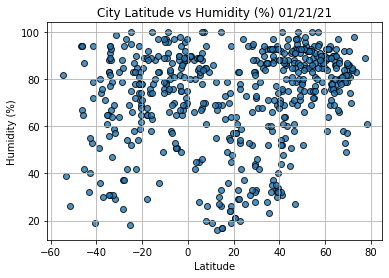

In [14]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidth=1, marker="o",
            label = "Cities", alpha = .8
           )
#Incorporate other properties
plt.title(f"City Latitude vs Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the plt
plt.savefig("weather_data/Fig2.png")
plt.show() 

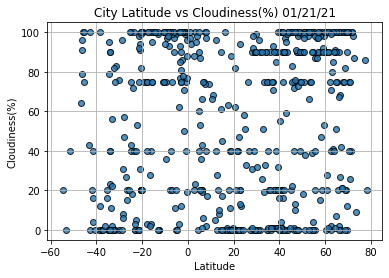

In [15]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidth=1, marker="o",
            label = "Cities", alpha = .8
           )
#Incorporate other properties
plt.title(f"City Latitude vs Cloudiness(%) " + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the plt
plt.savefig("weather_data/Fig3.png")
plt.show() 

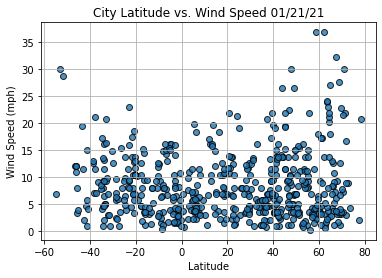

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
#Create a function to perform linear regression on weather 
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #create regression line y_values from the slope and intercept
    regress_values = x_values*slope + intercept
    
    #get the equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq + " (" + "r = " + str(round(r_value, 2))+")", 
                 text_coordinates, fontsize=12, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [76]:
#create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[city_data_df["lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["lat"] < 0]

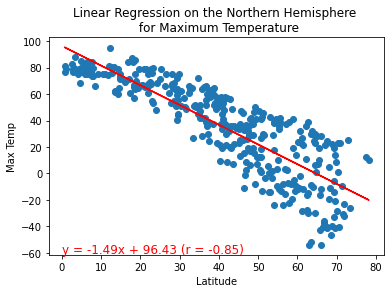

In [77]:
#set stagnant hemisphere variables (x) and y, then linear regression
northern_hemi_x = northern_hemi_df['lat']
southern_hemi_x = southern_hemi_df['lat']
x_values = northern_hemi_x
y_values = northern_hemi_df["max_temp"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (0,-60))

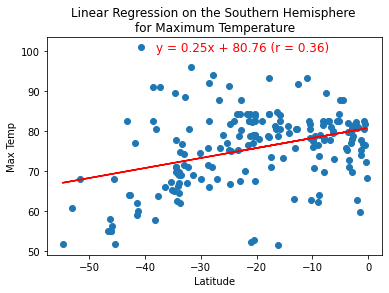

In [78]:
#linear regression for southern hemisphere
x_values = southern_hemi_x
y_values = southern_hemi_df["max_temp"]

#call teh fuction
plot_linear_regression(x_values, y_values,
                     'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp', (-38,100))

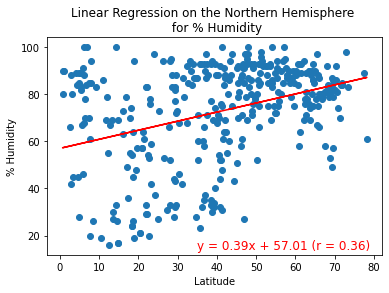

In [81]:
#set stagnant hemisphere variables (x) and y, then linear regression
x_values = northern_hemi_x
y_values = northern_hemi_df.humidity

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (35,14))

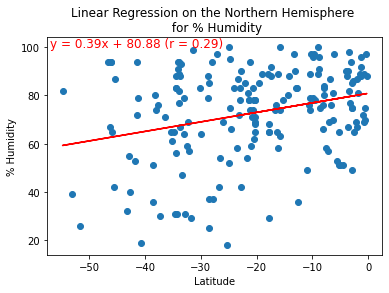

In [84]:
#set stagnant hemisphere variables (x) and y, then linear regression
x_values = southern_hemi_x
y_values = southern_hemi_df.humidity

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (-57,100))

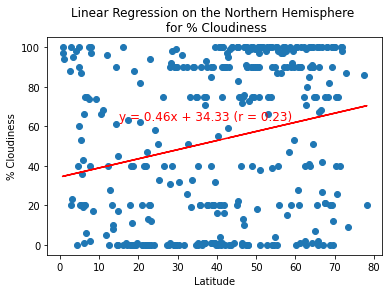

In [87]:
#set stagnant hemisphere variables (x) and y, then linear regression
x_values = northern_hemi_x
y_values = northern_hemi_df.cloudiness

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (15,63))

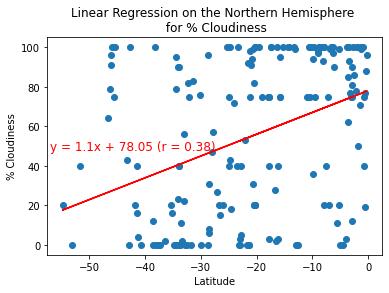

In [92]:
#set stagnant hemisphere variables (x) and y, then linear regression
x_values = southern_hemi_x
y_values = southern_hemi_df.cloudiness

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-57,48))

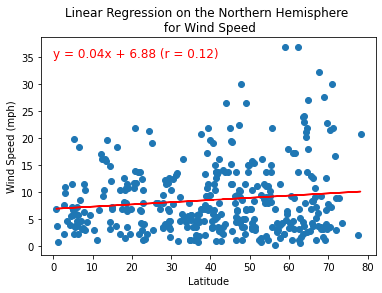

In [94]:
#set stagnant hemisphere variables (x) and y, then linear regression
x_values = northern_hemi_x
y_values = northern_hemi_df.wind_speed

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (0,35))

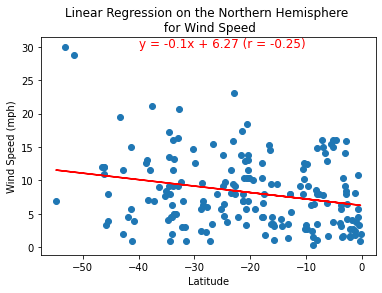

In [96]:
#set stagnant hemisphere variables (x) and y, then linear regression
x_values = southern_hemi_x
y_values = southern_hemi_df.wind_speed

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (-40,30))